### Case Study: The Role of Physical Strength in Modern Workplaces

**Title: Exploring the Impact of Physical Abilities on Job Performance: A Statistical Analysis in Physically Demanding Professions**

In today's high-tech world, the relevance of physical strength in various professional domains
remains an open question. While cognitive skills and computer-related abilities are highly
valued, there are significant occupations that require both cognitive aptitude and substantial
physical prowess. This raises the question: Does physical strength have a measurable impact
on job performance in physically demanding professions such as construction work, electrical
work, and auto mechanics? Furthermore, statisticians face the challenge of developing an
effective measure of physical ability that can efficiently and reliably assess candidates for
physically demanding roles without risking injury. Can statistical analysis provide insights into
the relationship between physical strength and job performance and aid in the selection
process for physically demanding jobs? Can statistical procedures validate a measure of
physical ability that can be utilized during candidate selection, ensuring efficient and safe
evaluations?

The data collected in this case study involved 560 individuals working in physically demanding
jobs. The participants' strength data were summarized into "grip" and "arm" scores. In
addition, job performance was assessed using two measures: ratings provided by supervisors
on the physical aspects of the participants' jobs, and scores obtained from simulations of
physically demanding work tasks, referred to as "sims." All variables are numeric. The data
analysis aimed to explore the relationship between these measures of strength and
performance

In [2]:
import pyforest
import scipy.stats as st
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
path = pd.read_excel("Dataset.xlsx",sheet_name=[0,1])

<IPython.core.display.Javascript object>

In [5]:
data=path[1]

In [6]:
data

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
555,113.0,87.0,49.1,-0.25
556,133.5,96.5,44.6,2.27
557,89.5,63.5,37.8,-0.93
558,95.0,70.0,35.4,-0.58


In [7]:
data.shape

(560, 4)

In [8]:
data.head()

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00


In [9]:
# Summary statistics of the dataset
data.describe()

,GRIP,ARM,RATINGS,SIMS
count,560.000000,560.000000,560.000000,560.000000
mean,110.185714,80.030357,40.986082,0.214321
std,20.219577,17.845114,7.806317,2.520152
min,29.000000,19.000000,21.600000,-4.170000
25%,99.000000,69.500000,35.600000,-0.800000
50%,110.000000,82.500000,40.800000,0.030000
75%,121.500000,90.500000,47.125000,0.910000
max,189.000000,132.000000,57.200000,49.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GRIP     560 non-null    float64
 1   ARM      560 non-null    float64
 2   RATINGS  560 non-null    float64
 3   SIMS     560 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


In [11]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
GRIP       0
ARM        0
RATINGS    0
SIMS       0
dtype: int64


**There are no missing values in this dataset.**

In [16]:
data.GRIP.skew(),data.RATINGS.skew(),data.SIMS.skew(),data.ARM.skew(),data.GRIP.kurt(),data.ARM.kurt(),data.RATINGS.kurt(),data.SIMS.kurt()

(-0.07221333270920019,
 -0.0901889263357079,
 13.087882618682537,
 -0.5602644944834673,
 2.2182613133515674,
 0.9981029987787049,
 -0.5892564532879709,
 251.3775063820991)

<IPython.core.display.Javascript object>

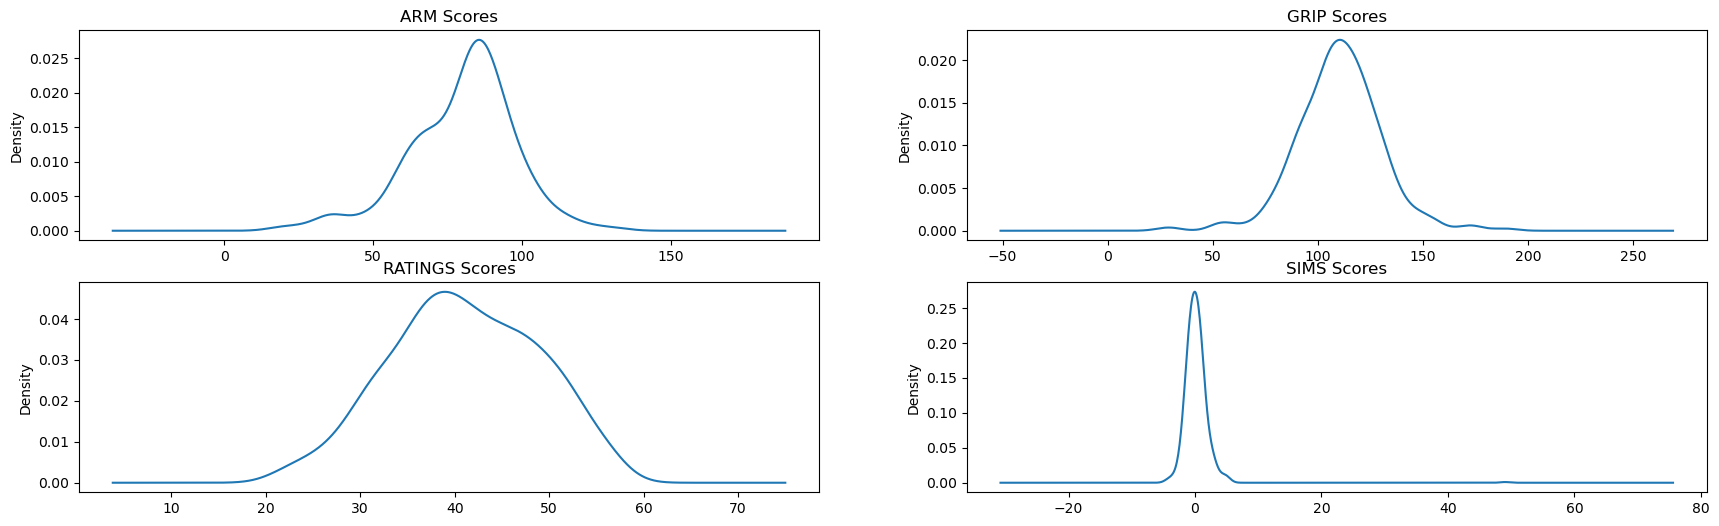

In [17]:
fig,ax=plt.subplots(2,2,figsize=(21,6))
data.ARM.plot(kind='kde',ax=ax[0,0])
ax[0,0].set_title("ARM Scores")
data.GRIP.plot(kind='kde',ax=ax[0,1])
ax[0,1].set_title("GRIP Scores")
data.RATINGS.plot(kind='kde',ax=ax[1,0])
ax[1,0].set_title("RATINGS Scores")
data.SIMS.plot(kind='kde',ax=ax[1,1])
ax[1,1].set_title("SIMS Scores");

**Inference:**
- GRIP Scores,ARM Scores,SIMS and RATINGS are approx normally distributed.GRIP,ARM,SIMS scores are slightly leptokurtic whereas RATINGS is slightly platykurtic
- Scores obtained from simulations of physically demanding work tasks has a different range of values.

### Heatmap to find correlation between variables

<IPython.core.display.Javascript object>

<Axes: >

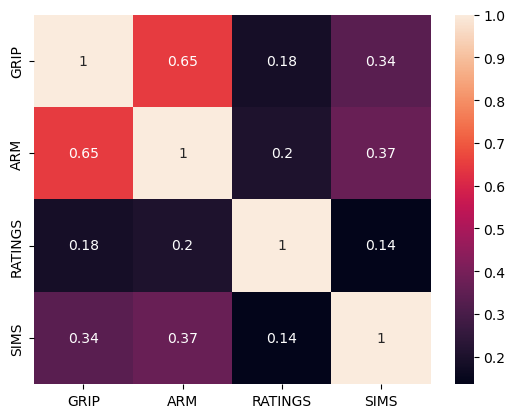

In [19]:
sns.heatmap(data.corr(),annot=True)

**Inference:**
- The given data shows that there is moderate positive correlation between grip strengths and sims,but a weak correlation between grip strength and ratings. It indicates that the ratings by supervisors is given for a different context compared to the sims.
- There is also a good correlation between arm strength and grip strength as both indicate physical strengths.
- However there is weak correlation between arm strength(or grip strength) and ratings by supervisor which indicates that the ratings by supervisors is not dependent completely on physical strengths. They are evaluated on some other parameters as well which is not captured in the given data.
- There is a weak positive correlation between the ratings by supervisors and by simulations. May be they are evaluated for different strength levels.

Both Grip strength and Arm strength distribution resembles Normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

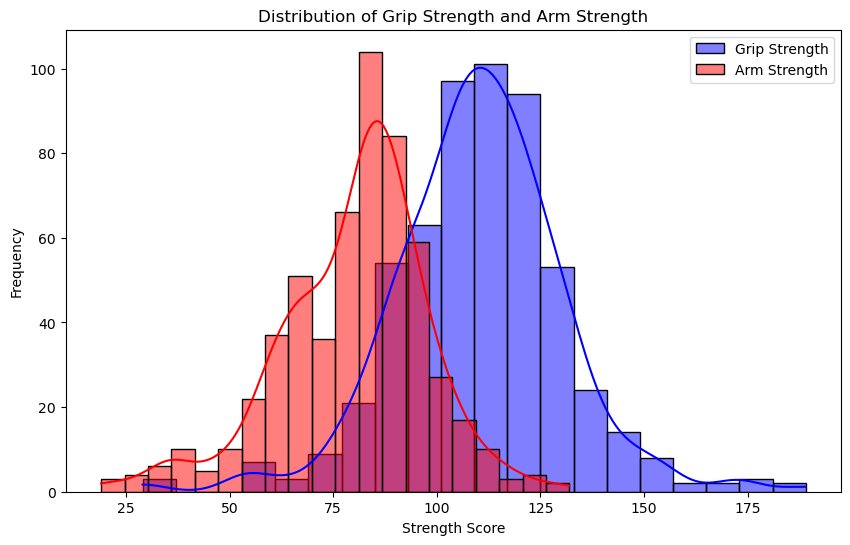

In [20]:
# Visualization for distribution of grip strength and arm strength
plt.figure(figsize=(10, 6))
sns.histplot(data['GRIP'], bins=20, kde=True, color='blue', label='Grip Strength')
sns.histplot(data['ARM'], bins=20, kde=True, color='red', label='Arm Strength')
plt.xlabel('Strength Score')
plt.ylabel('Frequency')
plt.title('Distribution of Grip Strength and Arm Strength')
plt.legend()
plt.show()

### Correlation Analysis

H0: There is no correlation b/w GRIP strength and Ratings by supervisor, Rho=0

H1: There is correlation b/w Grip strength and Ratings by supervisor, Rho !=0

Rho= (population correlation coefficient)

In [72]:
# Correlation between grip strength and ratings provided by supervisors on the physical aspects of the participants' jobs
grip_strength_corr, grip_strength_pval = pearsonr(data['GRIP'], data['RATINGS'])

In [47]:
print("Correlation between Grip Strength and Ratings by Supervisors:", grip_strength_corr)
print("P-value for Grip Strength and Ratings by Supervisors:", grip_strength_pval)

Correlation between Grip Strength and Ratings by Supervisors: 0.18468850127218173
P-value for Grip Strength and Ratings by Supervisors: 1.0892274950685151e-05


### Inference: Grip and Ratings

- The p-value associated with the correlation between grip strength and performance ratings is approx 0.000011. Since this p-value< alpha(0.05)
- Reject the null hypothesis and conclude that there is a statistically significant correlation between grip strength and ratings by supervisors on the physical aspects of the participants' jobs.
- The correlation coefficient between grip strength and performance ratings is approximately 0.185. This indicates a positive but relatively weak linear relationship between grip strength and ratings by supervisors on the physical aspects of the participants' jobs.


H0: There is no correlation b/w Arm strength and Ratings by supervisor, Rho=0

H1: There is correlation b/w Arm strength and Ratings by supervisor, Rho !=0

Rho= (population correlation coefficient)

In [73]:
# Correlation between arm strength and ratings by supervisors on the physical aspects of the participants' jobs.
arm_strength_corr, arm_strength_pval = pearsonr(data['ARM'], data['RATINGS'])

In [74]:
# Output the correlation results
print("Correlation between Arm Strength and Ratings by Supervisor:", arm_strength_corr)
print("P-value for Arm Strength and Ratings by Supervisor:", arm_strength_pval)


Correlation between Arm Strength and Ratings by Supervisor: 0.20391705598504725
P-value for Arm Strength and Ratings by Supervisor: 1.1388197993122512e-06


### Inference: Arm and Ratings

- The p-value associated with the correlation between arm strength and performance ratings is approximately 1.1388e-06 (or 0.0000011388). Similar to grip strength, p-value<0.05. 
- Thus, we'll reject Null Hypothesis indicating a statistically significant correlation between arm strength and ratings by supervisor.
- The correlation coefficient between arm strength and performance ratings is approximately 0.204. This indicates a slightly moderate positive linear relationship between arm strength and ratings by supervisor compared to grip strength.

### Inferences for effect of Grip strength and Arm strength on Ratings by supervisor on physical aspects.
The positive correlations between both grip strength and arm strength with performance ratings suggest that individuals with higher levels of physical strength tend to have better ratings by supervisors on the physical aspects of the participants' jobs in physically demanding professions.

While the correlations are statistically significant, it's important to note that they are relatively weak, indicating that physical strength is just one of many factors that contribute to job performance in physically demanding professions. Other factors such as skills, experience, and work ethic may also play significant roles.

### Retension Strategy:

Providing opportunities for physical fitness training and wellness programs may help employees improve their physical strength, potentially leading to better job performance and overall well-being in physically demanding professions.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

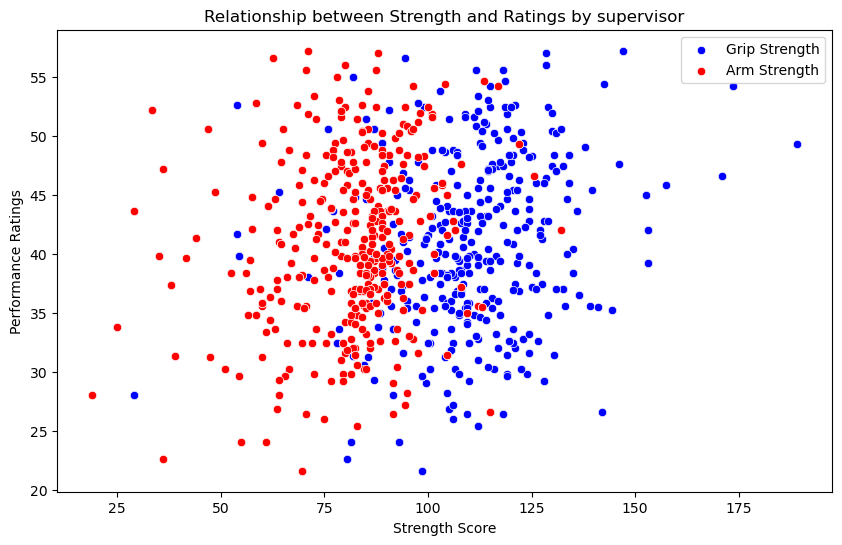

In [75]:
# Relationship between strength and ratings by supervisors on the physical aspects of the participants' jobs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRIP', y='RATINGS', data=data, color='blue', label='Grip Strength')
sns.scatterplot(x='ARM', y='RATINGS', data=data, color='red', label='Arm Strength')
plt.xlabel('Strength Score')
plt.ylabel('Performance Ratings')
plt.title('Relationship between Strength and Ratings by supervisor')
plt.legend()
plt.show()

-----

**Comparison of Ratings and Sims Scores:**
- Null Hypothesis: There is no difference between job performance ratings by supervisors and Sims scores.
- Alternate Hypothesis: There is a significant difference between job performance ratings by supervisors and Sims scores.

In [24]:
st.ttest_ind(data.RATINGS,data.SIMS)

Ttest_indResult(statistic=117.61941390116564, pvalue=0.0)

**Observations**
- Since pvalue < 0.05, there is difference between ratings and Sims scores.
- Interpretation: It suggests that the two measures of job performance capture different aspects of performance or have different sensitivities to strength levels.

---------------------

Assumtions:

H0: There is no correlation b/w Grip strength and scores obtained from simulations of physically demanding work tasks(SIMS), Rho=0

H1: There is correlation b/w Grip strength and scores obtained from simulations of physically demanding work tasks(SIMS), Rho !=0

Rho= (population correlation coefficient)

In [76]:
# Correlation between grip strength and scores obtained from simulations of physically demanding work tasks(SIMS)
grip_strength_sims_corr, grip_strength_sims_pval = pearsonr(data['GRIP'], data['SIMS'])

In [77]:
print("Correlation between Grip Strength and SIMS:", grip_strength_sims_corr)
print("P-value for Grip Strength and SIMS:", grip_strength_sims_pval)

Correlation between Grip Strength and SIMS: 0.3379197841203938
P-value for Grip Strength and SIMS: 2.0037560893919341e-16


### Inference- Correlation between Grip Strength and SIMS

- The p-value associated with the correlation between grip strength and SIMS is very small (2.004e-16). p-value<0.05. 
- Thus, we'll reject Null Hypothesis, indicating a statistically significant correlation between grip strength and SIMS.
- The correlation coefficient between grip strength and SIMS is approximately 0.3379, indicating a moderate positive linear relationship between grip strength and performance in simulated physically demanding work tasks.



Assumtions:

H0: There is no correlation b/w Arm strength and scores obtained from simulations of physically demanding work tasks(SIMS), Rho=0

H1: There is correlation b/w Arm strength and scores obtained from simulations of physically demanding work tasks(SIMS), Rho !=0

Rho= (population correlation coefficient)

In [78]:
# Correlation between arm strength and SIMS ratings
arm_strength_sims_corr, arm_strength_sims_pval = pearsonr(data['ARM'], data['SIMS'])

In [79]:
print("Correlation between Arm Strength and SIMS:", arm_strength_sims_corr)
print("P-value for Arm Strength and SIMS:", arm_strength_sims_pval)

Correlation between Arm Strength and SIMS: 0.36732016082636487
P-value for Arm Strength and SIMS: 2.49270598301617e-19


### Inference- Correlation between ARM Strength and SIMS

- The p-value associated with the correlation between arm strength and SIMS is also very small (2.49e-19). p-value<0.05.
- Thus, we'll reject Null Hypthesis, indicating that this correlation is statistically significant as well.
- The correlation coefficient between arm strength and SIMS is approximately 0.367, indicating a slightly stronger moderate positive linear relationship between arm strength and performance in simulated physically demanding work tasks compared to grip strength.


### Inferences for effect of Grip strength and Arm strength on scores obtained from simulations of physically demanding work tasks(SIMS) .
The positive correlations between both grip strength and arm strength with SIMS suggest that individuals with higher levels of physical strength, whether in their grip or arm, tend to perform better in simulated physically demanding work tasks.

While the correlations are statistically significant, they are moderate in strength. This indicates that while grip and arm strength are important factors in performance in simulated tasks, they are not the sole determinants. Individuals with higher strength levels may have a competitive advantage in performing such tasks.


### Retention Strategy:
Providing opportunities for physical training and development targeted at improving grip and arm strength may lead to enhanced performance in simulated physically demanding work tasks, potentially improving overall productivity and safety in the workplace.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

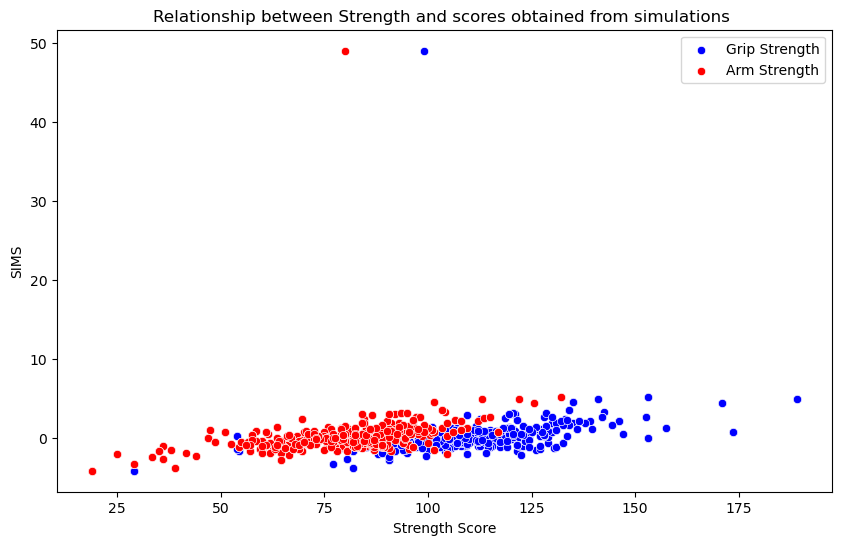

In [81]:
# Relationship between strength and job performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRIP', y='SIMS', data=data, color='blue', label='Grip Strength')
sns.scatterplot(x='ARM', y='SIMS', data=data, color='red', label='Arm Strength')
plt.xlabel('Strength Score')
plt.ylabel('SIMS')
plt.title('Relationship between Strength and scores obtained from simulations ')
plt.legend()
plt.show()
